In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('creditcard.csv', names = (0,31), header = 0)

In [5]:
data.head

<bound method NDFrame.head of                                                                                                                                                                                                                                                                                                   0   \
0    1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724     2.69   
1   -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   378.66   
    -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609  0.37743

In [6]:
df = pd.DataFrame(data = data)

In [7]:
df.head()

0   \
0  1.191857  0.266151 0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727 1.065235  0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
1 -1.358354 -1.340163 1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501 0.066084  0.717293 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
  -0.966272 -0.185226 1.792993 -0.863291 -0.010309  1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487 0.178228  0.507757 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
2 -1.158233  0.877737 1.548718  0.403034 -0.407193  0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843 0.538196  1.345852 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
  -0.425966  0.960523 1.141109 -0.168252  0.420987 -0.029728  0.476201  0.260314 -0.568671 -0.371407  1.341262 0.359894 -0.358091 -0.137134  0.517617  0.401726 -0.058133  0.068653 -0.033194  0.084968 -0.208254 -0.559825 -0.026398 -0.371427 -0.232794  0.105915  0.253844  0.081080    3.67   

                                                                                                                                                                                                                                                                                         31  
0  1.191857  0.266151 0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727 1.065235  0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   0  
1 -1.358354 -1.340163 1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501 0.066084  0.717293 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   0  
  -0.966272 -0.185226 1.792993 -0.863291 -0.010309  1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487 0.178228  0.507757 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   0  
2 -1.158233  0.877737 1.548718  0.403034 -0.407193  0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843 0.538196  1.345852 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   0  
  -0.425966  0.960523 1.141109 -0.168252  0.420987 -0.029728  0.476201  0.260314 -0.568671 -0.371407  1.341262 0.359894 -0.358091 -0.137134  0.517617  0.401726 -0.058133  0.068653 -0.033194  0.084968 -0.208254 -0.559825 -0.026398 -0.371427 -0.232794  0.105915  0.253844  0.081080   0

In [8]:
x = df.iloc[:,0:30].values


In [9]:
y = df.iloc[:, -1].values

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size= .33, random_state= 47)

In [11]:
lr = LogisticRegression()

In [12]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
pred = lr.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

1.0
[[211   0]
 [  0   8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



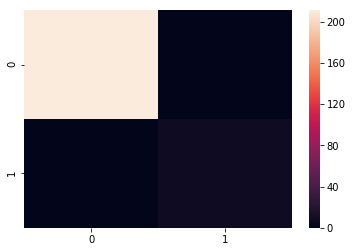

In [16]:
sns.heatmap(confusion_matrix(y_test, pred))


In [17]:
#ROC curve evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



In [18]:
fpr,tpr,_= roc_curve(y_test,pred)
fpr,tpr,_


(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [19]:
auc = roc_auc_score(y_test, pred)
auc

1.0

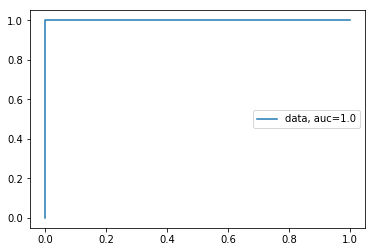

In [20]:
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=7)
plt.show()

In [21]:
# Random Forest
# Gradientsearch
# XGBoost

In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
rfr= RandomForestClassifier()
rfr.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
rfr.score(x_train,y_train)

1.0

In [26]:
predrfr= rfr.predict(x_test)

In [27]:
predrfr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [28]:
ac = accuracy_score(y_test,predrfr)
cf = confusion_matrix(y_test,predrfr)
cr = classification_report(y_test,predrfr)
ac


1.0

In [29]:
cf


array([[211,   0],
       [  0,   8]], dtype=int64)

In [30]:
cr

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       211\n           1       1.00      1.00      1.00         8\n\n   micro avg       1.00      1.00      1.00       219\n   macro avg       1.00      1.00      1.00       219\nweighted avg       1.00      1.00      1.00       219\n'

In [31]:
import xgboost
xgb= xgboost.XGBClassifier()

In [32]:
xgb.fit(x_train,y_train)
predx= xgb.predict(x_test)

In [33]:
print(accuracy_score(y_test,predx))
print(confusion_matrix(y_test,predx))
print(classification_report(y_test,predx))

1.0
[[211   0]
 [  0   8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



In [34]:
gbc = GradientBoostingClassifier()

In [35]:
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predg= gbc.predict(x_test)

In [36]:
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

1.0
[[211   0]
 [  0   8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



In [37]:
import pickle

In [38]:
saved_model = pickle.dumps(xgb) # saving data from jupyter to computer


In [39]:
xgb_from_pickle= pickle.loads(saved_model) # loading data back into jupyter


In [41]:
xgb_from_pickle.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [43]:
from sklearn.externals import joblib
joblib.dump(xgb, 'xgb_credit.pkl') # saving from jupyter to computer

['xgb_credit.pkl']

In [47]:
xgbload= joblib.load('xgb_credit.pkl') # from computer to jupyter
xgbload.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)